# Descriptive Statistics: Final Project

## Questions for Investigation
This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King).

For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

1. First, create a histogram depicting the relative frequencies of the card values.

2. Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Replace the drawn cards back into the deck and repeat this sampling procedure a total of at least thirty times.

3. Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.

4. Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

5. Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? 

In [1]:
import random
from matplotlib import pyplot as plt
import numpy as np

In [2]:
suits = ['♠','♥','♦','♣']
cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
all_cards = [suit + card for suit in suits for card in cards]
random.shuffle(all_cards)

In [3]:
def get_card(all_cards):
    return random.choice(all_cards)

In [4]:
def get_num(card):
    num = card[-1]
    if num == 'A':
        return 1
    elif num in ['J','Q','K']:
        return 10
    else:
        return eval(num)

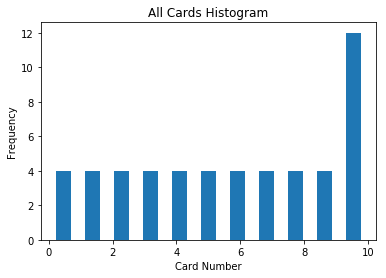

In [5]:
# All Cards Histogram
all_nums = [get_num(card) for card in all_cards]
plt.hist(all_nums,bins=11,rwidth=0.5)
plt.title('All Cards Histogram')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Draw 3 cards, Repeat 30 times
all_draws = []
all_sums = []
for _ in range(30):
    three_cards = []
    sums = 0
    for __ in range(3):
        card = get_card(all_cards)
        three_cards.append(card)
        sums += get_num(card)
    all_draws.append(three_cards)
    all_sums.append(sums)       

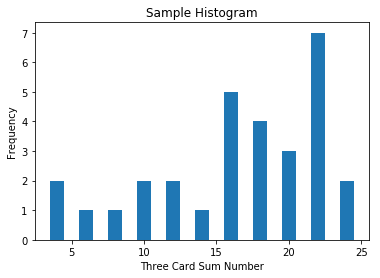

In [7]:
# All Cards Histogram
plt.hist(all_sums,bins=11, rwidth=0.5)
plt.title('Sample Histogram')
plt.xlabel('Three Card Sum Number')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Mean and Std of Population
mean_population = np.mean(all_nums)
std_population = np.std(all_nums)
print("Population mean: miu = %.2f" % mean_population)
print("Population std: sigma = %.2f" % std_population)
# Mean and Std of Samples
mean_samples = np.mean(all_sums)
std_samples = np.std(all_sums)
print("Sample mean: miu = %.2f" % mean_samples)
print("Sample std: sigma = %.2f" % std_samples)

Population mean: miu = 5.77
Population std: sigma = 3.42
Sample mean: miu = 15.97
Sample std: sigma = 5.85


### Samples Sum Distribution trends to be a normal distribution. 
- Its mean expects to be $3{\mu}=17.31$. 
- Its std expects to be ${\sqrt3\mu}=5.92$.

In [9]:
# 90% to fall
Z_score_min = (3-17.31)/5.92
per_min = 0.0078
Z_score_90 = 1.34
per_90 = 0.9078

N = Z_score_90*5.92+17.31
print('90%% chance to falls in range of [3, %d].' % int(N))
# Chances to falls into at least 20
Z_score_20 = (20-17.31)/5.92
per_20 = 0.6736
Z_score_max = (30-17.31)/5.92
per_max = 0.9838
print('%.2f%% chance to get over 20.' % (100*(per_max-per_20)))

90% chance to falls in range of [3, 25].
31.02% chance to get over 20.
